<a href="https://colab.research.google.com/github/hamzafarooq/Time-Series/blob/master/EDA_Iowa_Liquor_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install pyproj==1.9.6

In [ ]:
!pip install gmplot

     |████████████████████████████████| 174kB 3.5MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import datetime
import seaborn as sns

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
%%bigquery --project timeseriesmodeling-1 liquor_sales
SELECT *
FROM `bigquery-public-data.iowa_liquor_sales.sales`
where  date > '2018-01-01'


In [ ]:
#liquor_sales.to_csv('/content/drive/My Drive/Classroom/liquor_sales.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install gdown

In [ ]:
liquor_sales_orignial=pd.read_csv('/content/drive/My Drive/Classroom/Time Series Modeling/liquor_sales.csv')

In [ ]:
liquor_sales=liquor_sales_orignial

In [ ]:
df_rows = liquor_sales.shape[0]

In [ ]:
# Check for % of missing values in each column - drop nulls
liquor_sales.isnull().sum()/df_rows*100

Unnamed: 0                 0.000000
invoice_and_item_number    0.000000
date                       0.000000
store_number               0.000000
store_name                 0.000000
address                    0.105740
city                       0.105740
zip_code                   0.105740
store_location             9.228625
county_number              0.105772
county                     0.105740
category                   0.090164
category_name              0.090164
vendor_number              0.000048
vendor_name                0.000048
item_number                0.000000
item_description           0.000000
pack                       0.000000
bottle_volume_ml           0.000000
state_bottle_cost          0.000000
state_bottle_retail        0.000000
bottles_sold               0.000000
sale_dollars               0.000000
volume_sold_liters         0.000000
volume_sold_gallons        0.000000
dtype: float64

In [ ]:
liquor_sales = liquor_sales.dropna()
liquor_sales=liquor_sales.drop('Unnamed: 0',axis=1)

In [ ]:
## check for data types and outliers for continuous variables
liquor_sales.dtypes

invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                        object
zip_code                   float64
store_location              object
county_number              float64
county                      object
category                   float64
category_name               object
vendor_number              float64
vendor_name                 object
item_number                  int64
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

In [ ]:
liquor_sales['Date'] = pd.to_datetime(liquor_sales['date'])
liquor_sales.drop('date',axis=1)

,invoice_and_item_number,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date
1,INV-18452700008,3880,Target Store T-2454 / Council Bluffs,3804 Metro Dr,Council Bluffs,51503.0,POINT (-95.837595 41.220979),78.0,POTTAWATTA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2019-03-29
2,INV-26104700022,3645,Wal-Mart 1764 / Windsor Heights,1001 73rd St,Windsor Heights,50311.0,POINT (-93.716991 41.594787),77.0,Polk,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-25
3,INV-26094900045,3769,Wal-Mart 0753 / Cedar Fall,525 Brandilynn Blvd,Cedar Falls,50613.0,POINT (-92.440394 42.485042),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-24
4,INV-24534700017,3942,Twin Town Liquor,104 Highway 30 West,Toledo,52342.0,POINT (-92.579446 41.985985),86.0,TAMA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-01-14
5,INV-28537300002,3494,Sam's Club 6514 / Waterloo,210 East Tower Park Dr,Waterloo,50702.0,POINT (-92.353103 42.456374),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26906,Jack Daniels Single Barrel,6,750,27.59,41.39,12,496.68,9.0,2.37,2020-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234173,INV-27524400041,4397,Quik Trip #514 / Ankeny,802 E 1st St,Ankeny,50021.0,POINT (-93.586368 41.731862),77.0,POLK,1052100.0,Imported Brandies,420.0,MOET HENNESSY USA,48099,Hennessy VS,24,200,6.49,9.74,7,68.18,1.4,0.36,2020-05-27
6234174,INV-10410100011,4661,Quik Trip #531 / Grimes,"1900, SE 37th St",Grimes,50111.0,POINT (-93.773467 41.658525),77.0,POLK,1052100.0,Imported Brandies,420.0,MOET HENNESSY USA,48099,Hennessy VS,24,200,6.24,9.36,8,74.88,1.6,0.42,2018-02-15
6234176,INV-26778600020,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1052100.0,Imported Brandies,389.0,REMY COINTREAU USA INC,49189,Remy Martin VSOP,24,200,6.72,10.08,6,60.48,1.2,0.31,2020-04-24
6234177,INV-14562700014,5162,Urbandale Liquor,"6401, Douglas Ave",Urbandale,50322.0,POINT (-93.705732 41.629411),77.0,POLK,1052100.0,Imported Brandies,420.0,MOET HENNESSY USA,48101,Hennessy Vs Cognac Minis,10,600,28.14,42.21,1,42.21,0.6,0.15,2018-09-20


In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt


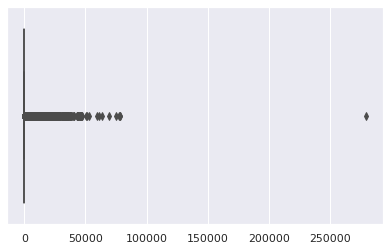

In [ ]:
sns.boxplot(x=liquor_sales[['pack','bottle_volume_ml','state_bottle_cost','bottles_sold','sale_dollars',\
                                'volume_sold_liters']])
plt.show()

In [ ]:
liquor_sales.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06,5.653650e+06
mean,3.938517e+03,5.127668e+04,5.691731e+01,1.050173e+06,2.655981e+02,4.827630e+04,1.238875e+01,8.825328e+02,1.037188e+01,1.556002e+01,1.114755e+01,1.452694e+02,9.342999e+00,2.463932e+00
std,1.133247e+03,9.853370e+02,2.741127e+01,8.537505e+04,1.378256e+02,6.562580e+04,8.079144e+00,5.223360e+02,9.139225e+00,1.370974e+01,3.097307e+01,4.920404e+02,3.738493e+01,9.876214e+00
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011100e+06,1.000000e+01,1.590000e+02,1.000000e+00,2.000000e+01,4.300000e-01,6.500000e-01,0.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00
25%,2.633000e+03,5.031700e+04,3.100000e+01,1.012200e+06,1.150000e+02,2.698600e+04,6.000000e+00,7.500000e+02,5.540000e+00,8.310000e+00,3.000000e+00,3.374000e+01,1.500000e+00,4.000000e-01
50%,4.004000e+03,5.110300e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.817800e+04,1.200000e+01,7.500000e+02,8.260000e+00,1.239000e+01,6.000000e+00,7.500000e+01,4.800000e+00,1.260000e+00
75%,4.984000e+03,5.231700e+04,7.700000e+01,1.062400e+06,3.890000e+02,6.486400e+04,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,1.050000e+01,2.770000e+00
max,9.938000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.994490e+05,6.000000e+01,6.000000e+03,1.871200e+03,2.806800e+03,1.195200e+04,2.795573e+05,1.181250e+04,3.120530e+03


In [ ]:
daily_sale=liquor_sales.groupby('Date')[['sale_dollars']].sum().sort_values(by = ['sale_dollars'], \
                                                                                ascending=False).reset_index()

daily_sale=daily_sale.sort_values('Date')
daily_sale.head(5)

,Date,sale_dollars
590,2018-01-02,860593.78
514,2018-01-03,1060001.27
532,2018-01-04,1031787.40
642,2018-01-05,498108.41
148,2018-01-08,1456710.50


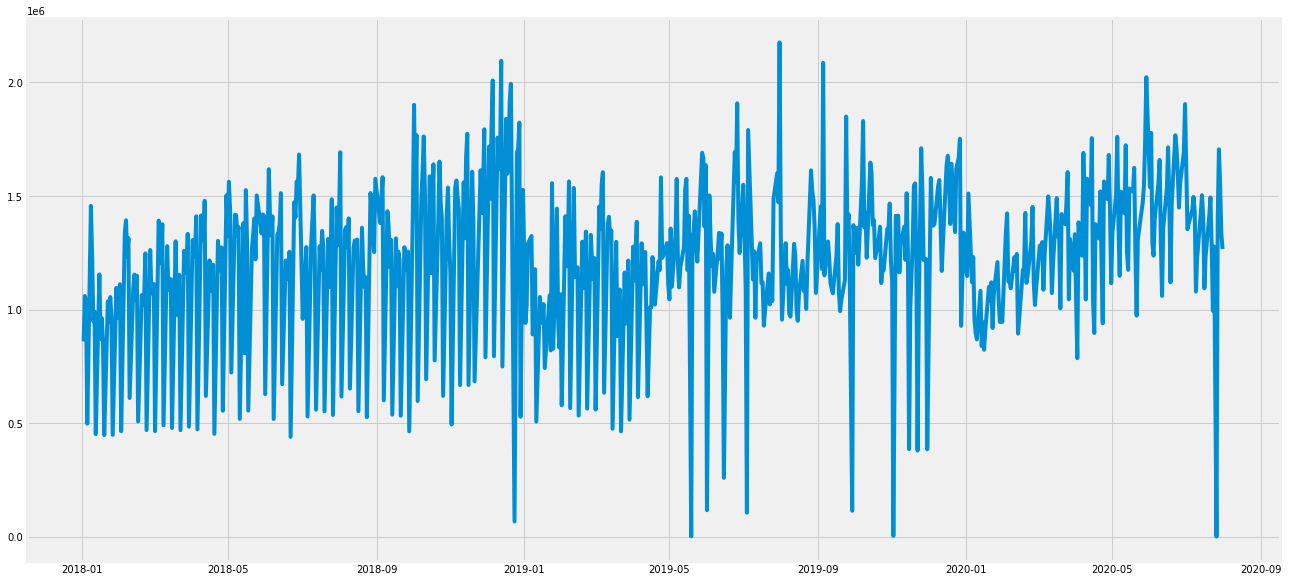

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(daily_sale['Date'],daily_sale['sale_dollars'])
plt.show()

In [ ]:
liquor_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date
1,INV-18452700008,2019-03-29,3880,Target Store T-2454 / Council Bluffs,3804 Metro Dr,Council Bluffs,51503.0,POINT (-95.837595 41.220979),78.0,POTTAWATTA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2019-03-29
2,INV-26104700022,2020-03-25,3645,Wal-Mart 1764 / Windsor Heights,1001 73rd St,Windsor Heights,50311.0,POINT (-93.716991 41.594787),77.0,Polk,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-25
3,INV-26094900045,2020-03-24,3769,Wal-Mart 0753 / Cedar Fall,525 Brandilynn Blvd,Cedar Falls,50613.0,POINT (-92.440394 42.485042),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-24
4,INV-24534700017,2020-01-14,3942,Twin Town Liquor,104 Highway 30 West,Toledo,52342.0,POINT (-92.579446 41.985985),86.0,TAMA,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-01-14
5,INV-28537300002,2020-07-07,3494,Sam's Club 6514 / Waterloo,210 East Tower Park Dr,Waterloo,50702.0,POINT (-92.353103 42.456374),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26906,Jack Daniels Single Barrel,6,750,27.59,41.39,12,496.68,9.0,2.37,2020-07-07


In [ ]:
liquor_sales.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'Date'],
      dtype='object')

# Finding sales for all Wal-Mart Stores

In [ ]:
wmt_list=[]
for i in set(liquor_sales['store_name']):
  if 'Wal-Mart' in i:
    wmt_list.append(i)

len(wmt_list)

54

In [ ]:
wmt_stores_only = liquor_sales[liquor_sales['store_name'].isin(wmt_list)]
wmt_stores_only.head(5)

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Date
2,INV-26104700022,2020-03-25,3645,Wal-Mart 1764 / Windsor Heights,1001 73rd St,Windsor Heights,50311.0,POINT (-93.716991 41.594787),77.0,Polk,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-25
3,INV-26094900045,2020-03-24,3769,Wal-Mart 0753 / Cedar Fall,525 Brandilynn Blvd,Cedar Falls,50613.0,POINT (-92.440394 42.485042),7.0,BLACK HAWK,1011400.0,Tennessee Whiskies,85.0,Brown Forman Corp.,26586,Gentleman Jack,12,750,20.01,30.02,12,360.24,9.0,2.37,2020-03-24
390,INV-15629100006,2018-11-12,3886,Wal-Mart 0646 / Anamosa,101 115 St,Anamosa,52205.0,POINT (-91.26496500000002 42.101677),53.0,JONES,1012100.0,Canadian Whiskies,260.0,DIAGEO AMERICAS,11298,Crown Royal,6,1750,31.99,47.99,30,1439.70,52.5,13.86,2018-11-12
465,INV-16195500041,2018-12-10,3663,Wal-Mart 1496 / Waterloo,1334 Flammang Dr,Waterloo,50702.0,POINT (-92.330801 42.460238),7.0,BLACK HAWK,1022200.0,100% Agave Tequila,330.0,Gemini Spirits,88036,Margaritaville Silver Tequila,12,750,6.19,9.29,12,135.24,9.0,2.37,2018-12-10
470,INV-23573600042,2019-11-29,3562,Wal-Mart 0797 / W Burlington,324 West Agency Rd,West Burlington,52655.0,POINT (-91.158407 40.813125),29.0,DES MOINES,1022200.0,100% Agave Tequila,330.0,Gemini Spirits,88036,Margaritaville Silver Tequila,12,750,7.51,11.27,12,111.48,9.0,2.37,2019-11-29


In [ ]:
locations=set(wmt_stores_only['store_location'])

In [ ]:
def long(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace('(',"")
    k=i.split()
    l.append(float(k[0]))
  return l
    



In [ ]:
def lat(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace(')',"")
    k=i.split()
    l.append(float(k[1]))
  return l

In [ ]:
wmt_stores_only['store_location'][0:10].values


array(['POINT (-93.716991 41.594787)', 'POINT (-92.440394 42.485042)',
       'POINT (-91.26496500000002 42.101677)',
       'POINT (-92.330801 42.460238)', 'POINT (-91.158407 40.813125)',
       'POINT (-90.245005 41.818874)', 'POINT (-92.456896 41.01455)',
       'POINT (-91.892924 42.450709)',
       'POINT (-93.62068300000001 42.05242)',
       'POINT (-90.620069 41.559268)'], dtype=object)

In [ ]:
wmt_stores_only['lat']= lat(wmt_stores_only['store_location'].values)
wmt_stores_only['long']= long(wmt_stores_only['store_location'].values)


In [ ]:
wmt_locations=wmt_stores_only[['store_number','lat','long']].drop_duplicates()

In [ ]:
len(wmt_locations)

54

In [ ]:
wmt_store_sales = wmt_stores_only.groupby('store_number')[['sale_dollars']].sum().sort_values(by = ['sale_dollars'], \
                                                                                ascending=False).reset_index()


In [ ]:
wmt_store_sales=pd.merge(wmt_store_sales,wmt_locations , how='left', on='store_number')

In [ ]:
wmt_store_sales.head(5)

,store_number,sale_dollars,lat,long
0,3644,1711328.58,41.644195,-93.505276
1,4209,1573935.35,41.688332,-93.771698
2,3757,1556303.65,42.530454,-96.372870
3,3899,1515982.71,41.558107,-93.795512
4,3562,1504839.47,40.813125,-91.158407


In [ ]:


# Extract the data we're interested in
lat = wmt_store_sales['lat'].values
lon = wmt_store_sales['long'].values
sales = wmt_store_sales['sale_dollars'].values
#area = cities['area_total_km2'].values

In [ ]:
lat

array([41.644195, 41.688332, 42.530454, 41.558107, 40.813125, 41.704864,
       41.646646, 42.505334, 41.695806, 42.485042, 43.290041, 41.580212,
       42.05242 , 41.949215, 43.416452, 42.034748, 42.489041, 42.43609 ,
       41.27737 , 41.559268, 41.818874, 43.126816, 41.45529 , 43.148239,
       42.017115, 42.101677, 40.978416, 42.460238, 41.047714, 43.060881,
       42.012918, 41.594787, 42.450709, 42.035093, 41.006375, 41.298516,
       42.081312, 42.700321, 42.04869 , 41.403853, 41.01455 , 42.663904,
       40.418589, 40.70856 , 41.410379, 41.720919, 41.306176, 41.296202,
       42.780675, 41.697436, 40.760282, 41.024891, 42.503407, 41.438006])

# Showing Geo-Location 
The code for this section was taken from :https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb#scrollTo=7R8Bx_Zmb0cM

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


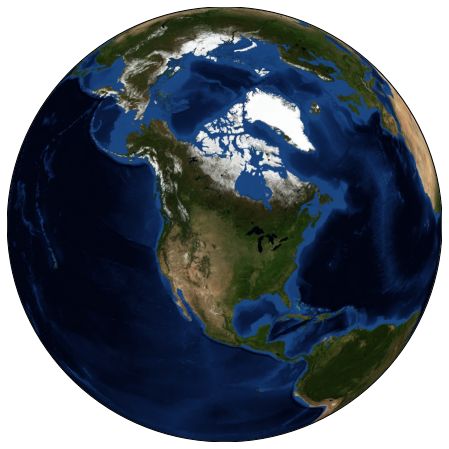

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

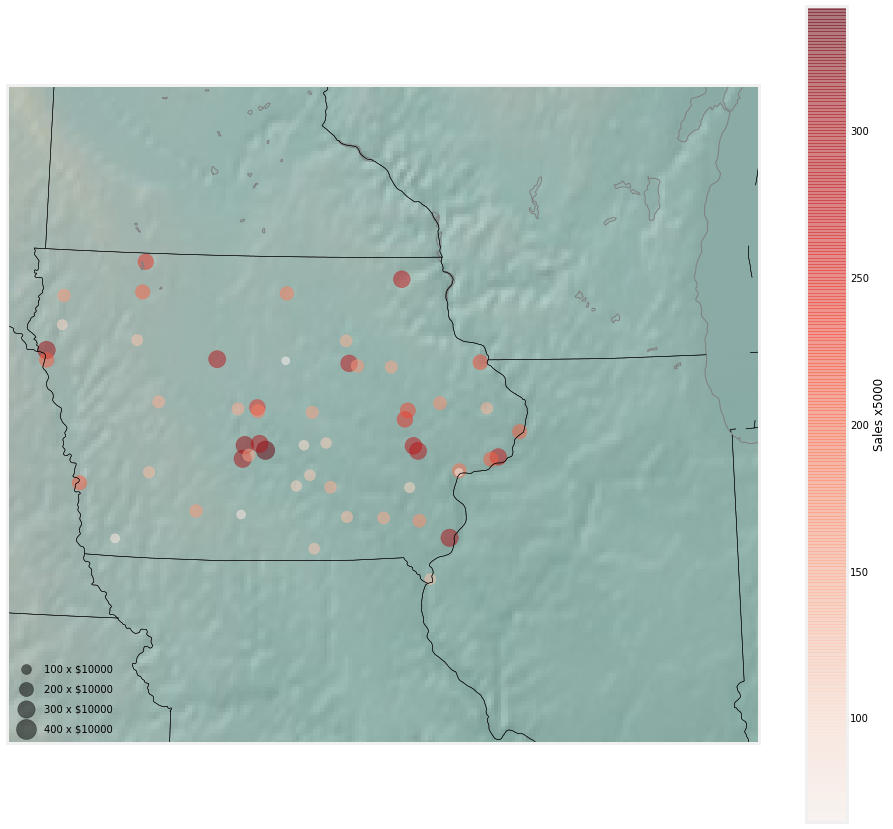

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='lcc', resolution='f', #40.6331° N, 89.3985° W
            lat_0=42, lon_0=-92,
            width=8E5, height=7E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='black')
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=sales/5000,s=sales/5000,cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'Sales x5000')
plt.clim(min(sales/5000), max(sales/5000))

# make legend with dummy points
for a in [100,200, 300, 400]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' x $10000')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [ ]:
# import gmplot package 
import gmplot 
import IPython
  
# GoogleMapPlotter return Map object 
# Pass the center latitude and 
# center longitude 
gmap1=gmplot.GoogleMapPlotter(30.3164945, 
                                78.03219179999999, 13 ) 
  
# Pass the absolute path 
#gmap1.draw(  ) 
gmap1.draw('map11.html')

In [ ]:
from IPython.display import IFrame
IFrame(src='/content/map11.html', width=900, height=600)

In [ ]:
from IPython.display import IFrame
IFrame(src='/content/map11.html', width=900, height=600)


# Exploratory Data Analysis
### Top 5 categories of liquor by total sales

In [ ]:
liquor_sales['category_name'] = liquor_sales['category_name'].str.lower().str.title()

In [ ]:
categories = pd.DataFrame(liquor_sales[['category_name','sale_dollars']])
Top_categories = categories.groupby('category_name')[['sale_dollars']].sum().sort_values(by = ['sale_dollars'], \
                                                                                ascending=False).reset_index()

In [ ]:
Top_categories.shape

(57, 2)

In [ ]:
Top_categories.head()

,category_name,sale_dollars
0,American Vodkas,1.213565e+08
1,Canadian Whiskies,1.000075e+08
2,Straight Bourbon Whiskies,5.551762e+07
3,Spiced Rum,5.169491e+07
4,Whiskey Liqueur,4.470933e+07


In [ ]:
categories_sales = Top_categories.head(10)
categories_sales

,Category Name,Sale (Dollars)
0,Canadian Whiskies,2.859671e+08
1,American Vodkas,1.738240e+08
2,Spiced Rum,1.693363e+08
3,Straight Bourbon Whiskies,1.373622e+08
4,Vodka 80 Proof,1.318597e+08
5,Whiskey Liqueur,1.126936e+08
6,Tennessee Whiskies,1.030843e+08
7,Imported Vodka,7.105979e+07
8,Blended Whiskies,6.637224e+07
9,Tequila,6.277742e+07


# Exploratory Data Analysis
### Top Selling 10 categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

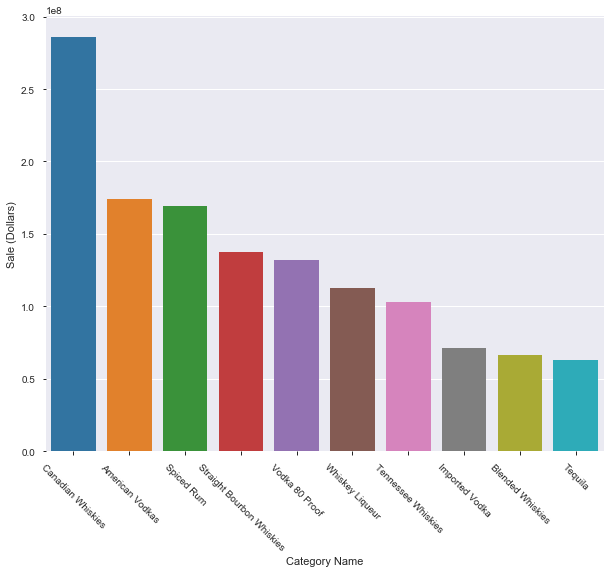

In [ ]:
# bar chart for total sales for each category
plt.figure(figsize=(10,8))
sns.barplot(x= 'Category Name', y = 'Sale (Dollars)', data=categories_sales)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Daily Sales

In [ ]:
liquor_sales['year'] = pd.DatetimeIndex(liquor_sales['Date']).year
liquor_sales['month'] = pd.DatetimeIndex(liquor_sales['Date']).month
liquor_sales['day'] = pd.DatetimeIndex(liquor_sales['Date']).day_name()

In [ ]:
daily_sales = liquor_sales.groupby('day')[['Sale (Dollars)']].sum().sort_values(by = ['day']).reset_index()
#daily_sales

In [ ]:
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

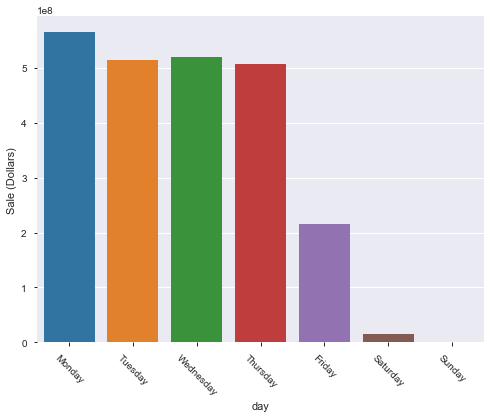

In [ ]:
# bar chart for total sales for each category
plt.figure(figsize=(8,6))
sns.barplot(x= 'day', y = 'Sale (Dollars)', data=daily_sales, order = daysofweek)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Yearly trend of liquor categories

In [ ]:
yearly_data = pd.DataFrame(liquor_sales[liquor_sales['Category Name'].isin(['Canadian Whiskies', 'American Vodkas', \
                                                                            'Spiced Rum','Straight Bourbon Whiskies', \
                                                                            'Vodka 80 Proof'])])

x = yearly_data.groupby(['year', 'Category Name'])['Sale (Dollars)'].sum().reset_index()


(array([2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
        2020., 2021.]), <a list of 11 Text xticklabel objects>)

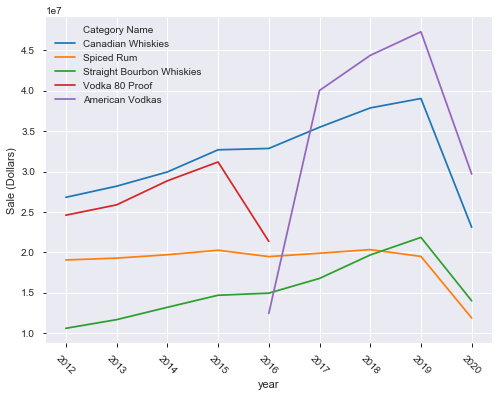

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x= 'year', y = 'Sale (Dollars)', data=x, hue='Category Name')
 
# Rotate x-labels
plt.xticks(rotation=-45)

## Drill deeper into the top selling categories - Canadian Whiskey

In [ ]:
Can_whiskies_items = liquor_sales[liquor_sales['Category Name'] == 'Canadian Whiskies']

In [ ]:
Can_whiskies_items['Item Description'] = Can_whiskies_items['Item Description'].str.lower().str.title()

In [ ]:
Can_whiskies_items.groupby(['Item Description'])[['Bottles Sold', 'Sale (Dollars)']]\
.sum().sort_values(by = ['Bottles Sold', 'Sale (Dollars)'], ascending = False).reset_index().head(5)

,Item Description,Bottles Sold,Sale (Dollars)
0,Black Velvet,8968567,9.584432e+07
1,Crown Royal,1677382,3.815342e+07
2,Crown Royal Canadian Whisky,1571899,4.182745e+07
3,Canadian Ltd Whisky,1271794,1.169291e+07
4,Crown Royal Regal Apple,1241463,2.631850e+07


In [ ]:
Top_Whisky_items = pd.DataFrame(Can_whiskies_items[Can_whiskies_items['Item Description'].isin\
                                      (['Black Velvet', 'Crown Royal', 'Crown Royal Canadian Whisky',\
                                      'Canadian Ltd Whisky','Crown Royal Regal Apple'])])

Top_Whisky_items1 = Top_Whisky_items.groupby(['Item Description', 'year'])[['Bottles Sold', 'Sale (Dollars)']]\
.sum().sort_values(by = ['Item Description', 'year', 'Bottles Sold']).reset_index()
#Top_Whisky_items

## Bottles sold for Top 5 Canadian Whisky Items

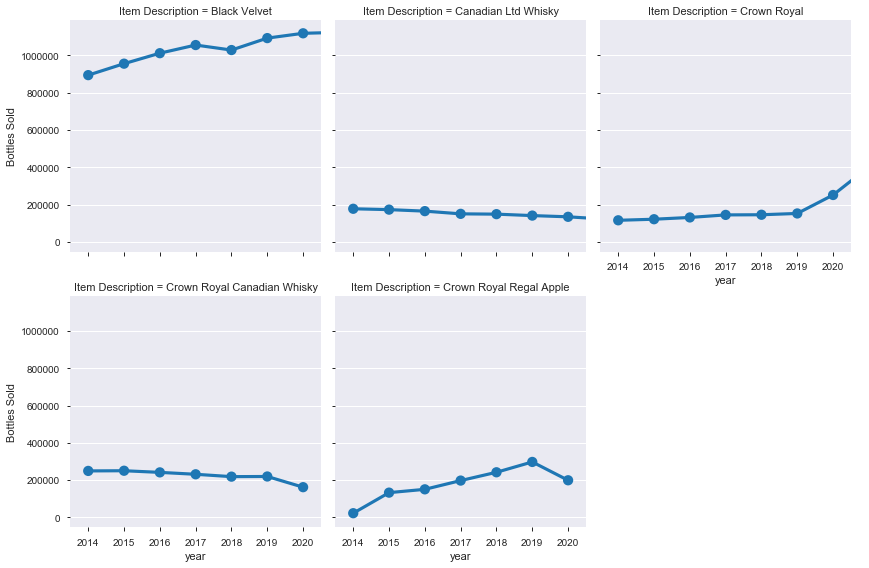

In [ ]:
#sns.scatterplot(x="Bottles Sold", y="Sale (Dollars)", data= Top_Whisky_items, hue= 'Item Description')

g = sns.FacetGrid(Top_Whisky_items, col="Item Description", col_wrap = 3, height=4)
g.map(sns.pointplot, "year", "Bottles Sold", alpha=.1)
g.add_legend();

## Sales for Top 5 Canadian Whisky Items

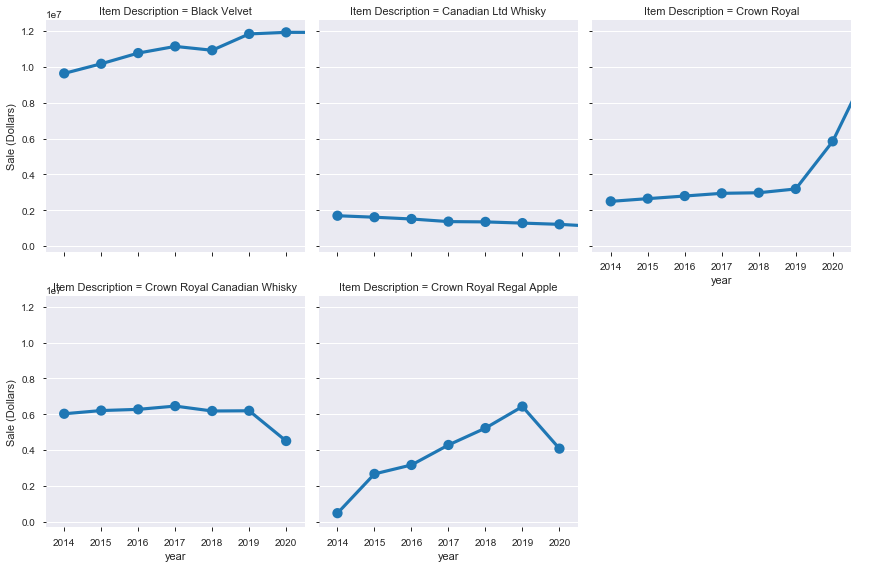

In [ ]:
b = sns.FacetGrid(Top_Whisky_items, col="Item Description", col_wrap = 3, height=4)
b.map(sns.pointplot, "year", "Sale (Dollars)", alpha=.1)
b.add_legend();

## Average Markup for Canadian Whisky Items


In [ ]:
Top_Whisky_items['Average_Markup'] = ((Top_Whisky_items['State Bottle Retail'] - Top_Whisky_items['State Bottle Cost'])/Top_Whisky_items['Bottles Sold'])/(Top_Whisky_items['State Bottle Cost']/Top_Whisky_items['Bottles Sold'])

In [ ]:
Top_Whisky_items.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day,Average Mark up,Average_Markup
10,S32200600021,2016-05-09,3907,Smokin' Joe's #16 Tobacco and Liquor,1504 Park Ave,Muscatine,52761,POINT (-91.030569 41.442458),70.0,Muscatine,...,4.61,2,9.22,0.75,0.20,2016,5,Monday,-0.501629,0.501629
21,S32170400119,2016-05-05,4829,Central City 2,1501 Michigan Ave,Des Moines,50314,POINT (-93.613739 41.60572),77.0,Polk,...,9.95,36,358.20,36.00,9.51,2016,5,Thursday,-0.500754,0.500754
32,S32209100014,2016-05-11,5065,Circle S Gordon Drive,2520 Gordon Dr,Sioux City,51106,POINT (-96.376341 42.489845),97.0,Woodbury,...,7.85,2,15.70,1.50,0.40,2016,5,Wednesday,-0.500956,0.500956
55,S32213200006,2016-05-10,3393,The Hangout Liquors,111 W Main St.,Riceville,50466,POINT (-92.555014 43.363838),66.0,Mitchell,...,14.93,6,89.58,10.50,2.77,2016,5,Tuesday,-0.539175,0.539175
137,S32140800017,2016-05-04,4676,Sam's Mini Mart / Sioux City,711 Gordon Dr,Sioux City,51101,POINT (-96.401114 42.489817),97.0,Woodbury,...,9.95,3,29.85,3.00,0.79,2016,5,Wednesday,-0.500754,0.500754


In [ ]:
Top_Whisky_Markup = Top_Whisky_items.groupby(['Item Description'])[['Average_Markup']]\
.sum().sort_values(by = ['Average_Markup'], ascending = False).reset_index()

Top_Whisky_Markup

,Item Description,Average_Markup
0,Black Velvet,230718.164733
1,Canadian Ltd Whisky,60298.693465
2,Crown Royal Canadian Whisky,59269.734408
3,Crown Royal,59190.854465
4,Crown Royal Regal Apple,54091.020610
